# Daily Challenge : Titanic

## Dataset Analysis
In this project, you’ll work with the Titanic dataset. The objective is to use basic pandas, numpy, and matplotlib techniques to preprocess, explore, and analyze the data. You'll aim to gather insights about the survival of passengers on the Titanic and understand the factors that may have influenced their survival.

### Tasks Outline:
1. **Load the Data**
2. **Explore the Data**
3. **Visualize the Data**
4. **Preprocess the Data**
5. **Data Analysis**

---

### 1. Load the Data:
- Import the Titanic dataset and convert it into a pandas DataFrame.
- Ensure that you have the necessary libraries (pandas, numpy, matplotlib) installed and imported.


In [1]:
# Importing libraries and loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')

## 2. Explore the Data:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Visualize the Data:

#### Create a pie chart to show the ratio of male to female passengers.

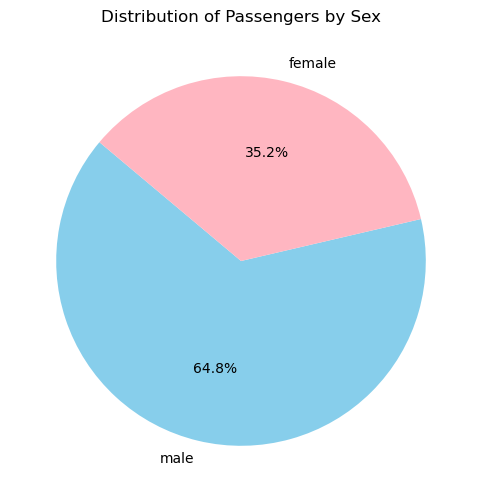

In [6]:
# Count the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'])
plt.title('Distribution of Passengers by Sex')
plt.show()

#### Create a histogram to show the distribution of passenger ages.

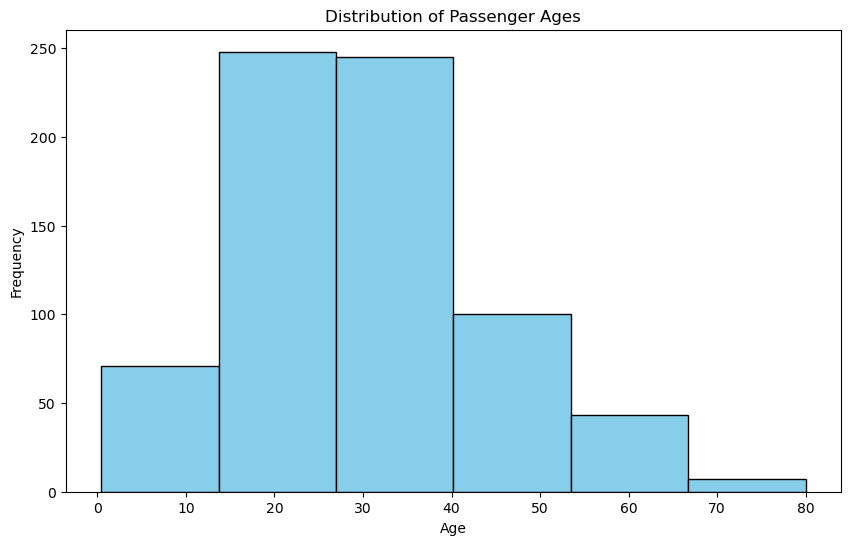

In [7]:
# Decide the number of bins
number_of_bins = 6 # for example, change this number based on your specific analysis needs

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=number_of_bins, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### Create a bar plot to show the number of passengers who survived and didn’t survive.

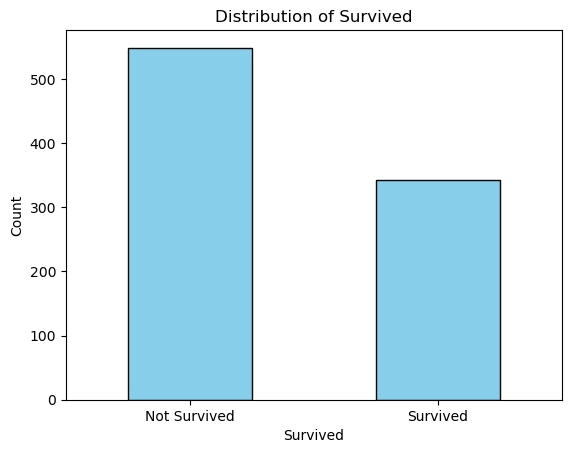

In [8]:
# Get the value counts
survived_counts = df['Survived'].value_counts()

# Create a bar plot
ax = survived_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')

# Set custom x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Survived', 'Survived'], rotation=0)

# Show the plot
plt.show()

#### Create a stacked bar plot to show the number of passengers who survived and didn’t survive, split by gender.

In [9]:
# Group the data by 'Sex' and 'Survived', and calculate the counts
survival_gender_counts = df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender_counts

Survived,0,1
Sex,,
female,81,233
male,468,109


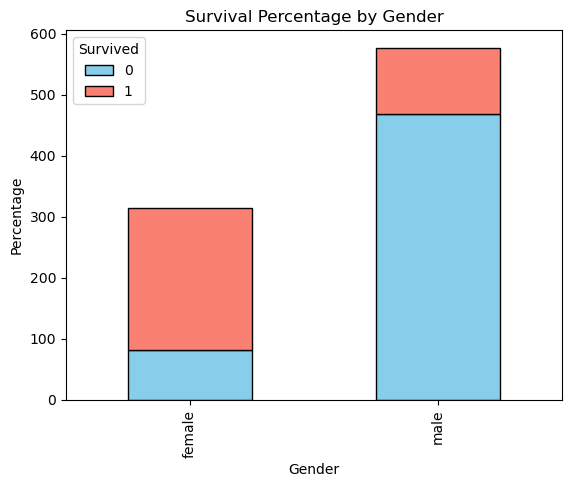

In [10]:
# Create a stacked bar plot
ax = survival_gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Survival Percentage by Gender')

# Show the plot
plt.show()

#### Below is a little bonus it was not part of the task but I was just curious how to add the percentage signs to this kind of graph

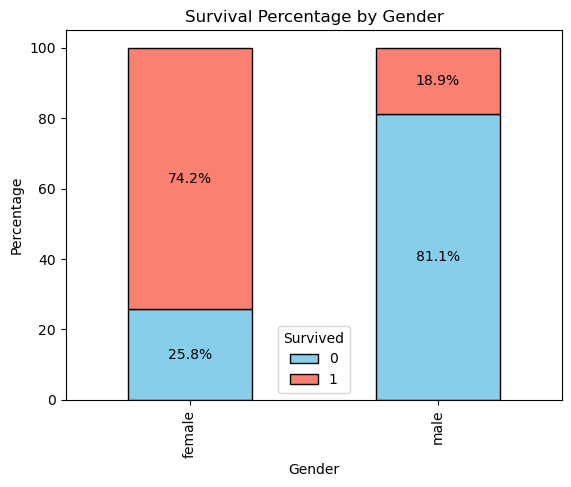

In [11]:
# Calculate the total count of passengers for each gender
total_gender_counts = survival_gender_counts.sum(axis=1)

# Calculate the percentage of survival for each gender
survival_gender_percentage = survival_gender_counts.div(total_gender_counts, axis=0) * 100

# Create a stacked bar plot
ax = survival_gender_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Survival Percentage by Gender')

# Add percentage labels on top of the bars
for bars in ax.containers:
    # Format the label to display percentage with one decimal place
    labels = [f'{w.get_height():.1f}%' if w.get_height() > 0 else '' for w in bars]

    # Set the labels on the bars
    ax.bar_label(bars, labels=labels, label_type='center', color='black')

# Show the plot
plt.show()


#### Create a scatter plot to show the correlation between fare and age.

In [12]:
correlation = df['Fare'].corr(df['Age'])

print(f'Correlation between Fare and Age: {correlation:.2f}')

Correlation between Fare and Age: 0.10


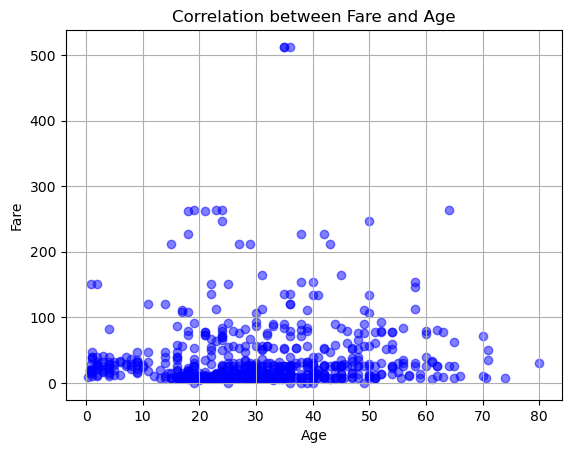

In [13]:
# Create a scatter plot
plt.scatter(df['Age'], df['Fare'], alpha=0.5, c='b')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation between Fare and Age')

# Show the plot
plt.grid(True)
plt.show()

#### A correlation coefficient of 0.12 suggests a very weak positive correlation between "Fare" and "Age" in our dataset. In general, when the correlation coefficient is close to 0, like in our case, it indicates that there is little to no linear relationship between the two variables.

## 4. Preprocess the data:

#### Handle missing values in the ‘Age’ column by replacing them with the mean or median age.

In [14]:
median_age = df['Age'].median()

# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(median_age, inplace=True)

# Verifing that missing values have been filled
print(df['Age'].isnull().sum())

0


#### Normalize the ‘Fare’ column using a suitable method.

In [15]:
fare_min = df['Fare'].min()
fare_max = df['Fare'].max()

# Min-Max scaling formula
df['Fare_normalized'] = (df['Fare'] - fare_min) / (fare_max - fare_min)
df['Fare_normalized'].head(10)

0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
5    0.016510
6    0.101229
7    0.041136
8    0.021731
9    0.058694
Name: Fare_normalized, dtype: float64

#### Convert the ‘Sex’ column into numerical representation using one-hot encoding.

In [16]:
df = pd.get_dummies(df, columns=['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_normalized,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.139136,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.015469,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.103644,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.015713,False,True


## 5. Data Analysis:

#### Calculate the survival rate for different genders.

In [19]:
survival_rate_male = df[df['Sex_male'] == 1]['Survived'].mean() * 100
survival_rate_female = df[df['Sex_female'] == 1]['Survived'].mean() * 100

print("\nSurvival rates in percentages:")
print(f"Male: {survival_rate_male:.2f}%")
print(f"Female: {survival_rate_female:.2f}%")


Survival rates in percentages:
Male: 18.89%
Female: 74.20%


#### Calculate the survival rate for different passenger classes.

In [20]:
survival_rates_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rates by passenger class (in %):")
print(survival_rates_pclass)


Survival rates by passenger class (in %):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


#### Identify the passenger with the highest fare.

In [25]:
max_fare = df['Fare'].max()
passenger_with_highest_fare = df[df['Fare'] == max_fare]
print("\nPassenger(s) with the highest fare:")
print(passenger_with_highest_fare[['Name', 'Fare', "Survived"]])


Passenger(s) with the highest fare:
                                   Name      Fare  Survived
258                    Ward, Miss. Anna  512.3292         1
679  Cardeza, Mr. Thomas Drake Martinez  512.3292         1
737              Lesurer, Mr. Gustave J  512.3292         1


In [53]:
# Sort the DataFrame by 'Fare' in descending order to see the highest fares first.
sorted_df = df.sort_values(by='Fare', ascending=False)

# Select only the specified columns.
selected_columns = sorted_df[['Name', 'Age', 'Sex_female', 'Sex_male', 'Fare', 'Survived']]

# Display the resulting DataFrame.
print("Passengers sorted by fare (highest first):")
selected_columns.head(3)


Passengers sorted by fare (highest first):


,Name,Age,Sex_female,Sex_male,Fare,Survived
258,"Ward, Miss. Anna",35.0,True,False,512.3292,1
737,"Lesurer, Mr. Gustave J",35.0,False,True,512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",36.0,False,True,512.3292,1
